Please use the Traffic environment to run this notebook.

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import pickle

%matplotlib inline
use_local_db = True

In [2]:
def load_fl_data():
    with open('openskyobject.pkl', 'rb') as f:
        oso = pickle.load(f)
    return oso

if use_local_db:
    fl = load_fl_data()
    print('Data was successfully loaded from local storage')
    fl_data = fl.data

Data was successfully loaded from local storage


Check out the data:

In [3]:
fl_data.head()

,alert,altitude,callsign,day,destination,firstseen,geoaltitude,groundspeed,hour,icao24,...,lastseen,latitude,longitude,onground,origin,spi,squawk,timestamp,track,vertical_rate
13432,False,34725.0,AAL1114,2021-05-24 00:00:00+00:00,KDFW,2021-05-24 14:42:07+00:00,36625.0,448.0,2021-05-24 15:00:00+00:00,aa8315,...,2021-05-24 17:03:42+00:00,26.794537,-81.471757,False,KMIA,False,None,2021-05-24 15:00:01+00:00,294.221920,1728.0
201075,False,35000.0,ENY4155,2021-05-24 00:00:00+00:00,KDFW,2021-05-24 13:59:34+00:00,36125.0,471.0,2021-05-24 15:00:00+00:00,a1d873,...,2021-05-24 16:48:29+00:00,34.864838,-111.834486,False,KSBP,False,3577,2021-05-24 15:00:01+00:00,90.364936,64.0
195706,False,39975.0,AAL221,2021-05-24 00:00:00+00:00,KDFW,2021-05-24 07:32:17+00:00,41625.0,457.0,2021-05-24 15:00:00+00:00,ab5c12,...,2021-05-24 17:15:41+00:00,39.343094,-78.926557,False,EHAM,False,4377,2021-05-24 15:00:01+00:00,246.965863,-64.0
188699,False,38000.0,UAL279,2021-05-24 00:00:00+00:00,KDFW,2021-05-24 13:59:33+00:00,39875.0,443.0,2021-05-24 15:00:00+00:00,a6f482,...,2021-05-24 17:01:12+00:00,36.838394,-81.408119,False,KEWR,False,1732,2021-05-24 15:00:01+00:00,238.570434,0.0
183915,False,36000.0,AAL366,2021-05-24 00:00:00+00:00,KDFW,2021-05-24 13:21:45+00:00,37900.0,436.0,2021-05-24 15:00:00+00:00,a99077,...,2021-05-24 16:05:22+00:00,34.625973,-92.378883,False,82PA,False,2236,2021-05-24 15:00:01+00:00,252.230284,-64.0


In [4]:
callsigns = fl_data['callsign'].unique()
print('There are {} callsigns in the dataframe'.format(len(callsigns)))

There are 299 callsigns in the dataframe


In [5]:
print('Number of NA entries by columns')
fl_data.isna().sum()

Number of NA entries by columns


alert                 0
altitude          39620
callsign              0
day                   0
destination           0
firstseen             0
geoaltitude       40859
groundspeed         830
hour                  0
icao24                0
last_position     41296
lastseen              0
latitude          41296
longitude         41296
onground              0
origin           225911
spi                   0
squawk           231977
timestamp             0
track               830
vertical_rate       830
dtype: int64

In [7]:
print('NA entries group by callsign')
dfna = fl_data.isna()
dfna['callsign'] = fl_data['callsign']
dfna_stat = dfna.groupby(['callsign']).sum()
dfna_stat.head(80)

NA entries group by callsign


,alert,altitude,day,destination,firstseen,geoaltitude,groundspeed,hour,icao24,last_position,lastseen,latitude,longitude,onground,origin,spi,squawk,timestamp,track,vertical_rate
callsign,,,,,,,,,,,,,,,,,,,,
AAL1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
AAL1019,0,2,0,0,0,7,1,0,0,2,0,2,2,0,0,0,3626,0,1,1
AAL1025,0,2208,0,0,0,2209,0,0,0,2208,0,2208,2208,0,0,0,3679,0,0,0
AAL1055,0,2160,0,0,0,2161,0,0,0,2160,0,2160,2160,0,0,0,3689,0,0,0
AAL1059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAL2472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAL2484,0,2031,0,0,0,2032,0,0,0,2148,0,2148,2148,0,0,0,3234,0,0,0
AAL2487,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1004,0,0,0


As observed, there seems to be different missing patterns between fields. This is understandable since ADS-B does not require the aircraft to transmit the position/altitude information all the time. Only the status code is guaranteed to be always transmit. For more information, see: https://mode-s.org/decode/content/ads-b/1-basics.html. 

The observations here seem consistent with the function of ADS-B. There's also a lack of coverage to some area by OpenSky.

We also check if the timestamp is continuous or not. Let's take the flight AAL1025 for example:

In [23]:
timestamps_of_one_flight = fl_data[fl_data['callsign']=='AAL1025']['timestamp'].to_numpy()
epochs_of_one_flight = [x.value for x in timestamps_of_one_flight]

Let's see if there is any duplicate:

In [27]:
import collections
print([item for item, count in collections.Counter(epochs_of_one_flight).items() if count > 1])

[]


Good, so there is no duplicate. Let's check time continuity:

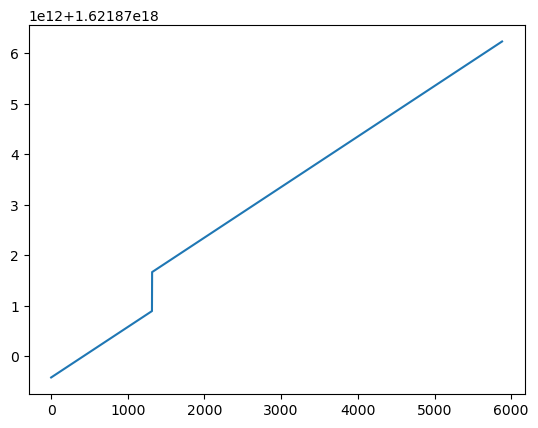

In [26]:
plt.plot(epochs_of_one_flight)

So the time is not continuous. We see a "jump" in timestamp around the 1200th entry. This indicates that beside there are some "NAs" in the field, there's a period of time when the aircraft disappeared totally from the radar.

Take a look at how many entries each columns miss:

In [29]:
dfna_stat['latitude'].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 205,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
       180,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,  14,
         1, 131,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   4,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,   0,
         0,   0,   1,   0,   0])

So it's clear that some callsigns miss 205 entries, 1 entry, 180 entries, etc...

In [30]:
dfna_stat['longitude'].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 205,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
       180,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,  14,
         1, 131,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   1,   0,   0,   0,   0,   1,   4,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   1,   0,   1,   0,
         0,   0,   1,   0,   0])

In [31]:
dfna_stat['altitude'].to_numpy()

array([  1,   0,   0,  79,   1,   0,   0,   0,   0,  40,   9,   0,   1,
         0,   0,   0,   0,  95,   0,   1,   1,   0,   0,   1,   0,  13,
        17,   4,   0,   0,   0,   0,  28,  17,   0,   0,   0,   0,   2,
         1, 149,   0, 121,   1,   1,   0,   0,   1,   0,   0,   0,   0,
         5,   0,   0,   0,   0,   1,   1,   0, 206,   0,   2,   0,   1,
        11,  43,   0,   0,   1,   1,   0,   0,   1,   1,   0,   3,   0,
       180,   0,   0,   1,   1,   0,   3,   1,   0,   0,   0,   0,  14,
         0, 131,   1,   1,   0,   0, 267,   0,   1,   2,   1,   0,   0,
         0,   0,   2,   0,   1,   0,   0,   1,   1,   0,   0,   1,   1,
         1,   1,   0,   0,   1,   1,   1,   0,   2,   1,   1,   1,   3,
         0,   0,   2,   2,   0])

This justify for the need to fill in the missing values using low-rank completion!